FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

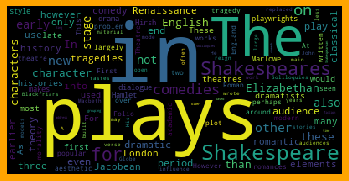

In [2]:
#imports used in project
import wordcloud
import numpy as np
from matplotlib import pyplot as myplot
from IPython.display import display
import fileupload
import io
import sys

#upload module; get .txt file from browse button.
def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()


def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # LEARNER for entry data
    non_punctuation_text=""
    for char in file_contents:
        if char not in punctuations:
            non_punctuation_text=non_punctuation_text+char
    words=non_punctuation_text.split()
    clean_words=[]
    frequencies={}
    for word in words:
        if word.isalpha():
            if word not in uninteresting_words:
                clean_words.append(word)
    for alpha_word in clean_words:
        if alpha_word not in frequencies:
            frequencies[alpha_word]=1
        else:
            frequencies[alpha_word]+=1
    #wordcloud module proccess data.
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(frequencies)
    return cloud.to_array()


# process result image

myimage = calculate_frequencies(file_contents)
myplot.imshow(myimage, interpolation = 'nearest')
myplot.axis('off')
myplot.gcf().set_facecolor("orange")
myplot.show()